<a href="https://colab.research.google.com/github/prasadbobby/pcos-training-model/blob/master/PCOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.__version__

'0.11.2'

In [ ]:
from google.colab import files
uploaded = files.upload()
pcos = pd.read_csv('pcos-data.csv')
pcos.head(5)

Saving data without infertility _final.csv to data without infertility _final.csv


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 42
0,1,10001,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,10002,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,10003,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,10004,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,10005,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [ ]:
pcos.drop('Patient File No.', inplace=True, axis=1)
pcos.drop('Sl. No', inplace=True, axis=1)
pcos.drop('Unnamed: 42', inplace=True, axis=1)
pcos.head(5)

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [ ]:
pcos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCOS (Y/N)             541 non-null    int64  
 1    Age (yrs)             541 non-null    int64  
 2   Weight (Kg)            541 non-null    float64
 3   Height(Cm)             541 non-null    float64
 4   BMI                    541 non-null    float64
 5   Blood Group            541 non-null    int64  
 6   Pulse rate(bpm)        541 non-null    int64  
 7   RR (breaths/min)       541 non-null    int64  
 8   Hb(g/dl)               541 non-null    float64
 9   Cycle(R/I)             541 non-null    int64  
 10  Cycle length(days)     541 non-null    int64  
 11  Marraige Status (Yrs)  540 non-null    float64
 12  Pregnant(Y/N)          541 non-null    int64  
 13  No. of aborptions      541 non-null    int64  
 14  FSH(mIU/mL)            541 non-null    float64
 15  LH(mIU

In [ ]:
pcos.isnull().sum()

PCOS (Y/N)               0
 Age (yrs)               0
Weight (Kg)              0
Height(Cm)               0
BMI                      0
Blood Group              0
Pulse rate(bpm)          0
RR (breaths/min)         0
Hb(g/dl)                 0
Cycle(R/I)               0
Cycle length(days)       0
Marraige Status (Yrs)    1
Pregnant(Y/N)            0
No. of aborptions        0
FSH(mIU/mL)              0
LH(mIU/mL)               0
FSH/LH                   0
Hip(inch)                0
Waist(inch)              0
Waist:Hip Ratio          0
TSH (mIU/L)              0
AMH(ng/mL)               0
PRL(ng/mL)               0
Vit D3 (ng/mL)           0
PRG(ng/mL)               0
RBS(mg/dl)               0
Weight gain(Y/N)         0
hair growth(Y/N)         0
Skin darkening (Y/N)     0
Hair loss(Y/N)           0
Pimples(Y/N)             0
Fast food (Y/N)          1
Reg.Exercise(Y/N)        0
BP _Systolic (mmHg)      0
BP _Diastolic (mmHg)     0
Follicle No. (L)         0
Follicle No. (R)         0
A

In [ ]:
pcos =pcos.dropna()

In [ ]:
pcos.isnull().sum()

PCOS (Y/N)               0
 Age (yrs)               0
Weight (Kg)              0
Height(Cm)               0
BMI                      0
Blood Group              0
Pulse rate(bpm)          0
RR (breaths/min)         0
Hb(g/dl)                 0
Cycle(R/I)               0
Cycle length(days)       0
Marraige Status (Yrs)    0
Pregnant(Y/N)            0
No. of aborptions        0
FSH(mIU/mL)              0
LH(mIU/mL)               0
FSH/LH                   0
Hip(inch)                0
Waist(inch)              0
Waist:Hip Ratio          0
TSH (mIU/L)              0
AMH(ng/mL)               0
PRL(ng/mL)               0
Vit D3 (ng/mL)           0
PRG(ng/mL)               0
RBS(mg/dl)               0
Weight gain(Y/N)         0
hair growth(Y/N)         0
Skin darkening (Y/N)     0
Hair loss(Y/N)           0
Pimples(Y/N)             0
Fast food (Y/N)          0
Reg.Exercise(Y/N)        0
BP _Systolic (mmHg)      0
BP _Diastolic (mmHg)     0
Follicle No. (L)         0
Follicle No. (R)         0
A

In [ ]:
pcos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 540
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCOS (Y/N)             539 non-null    int64  
 1    Age (yrs)             539 non-null    int64  
 2   Weight (Kg)            539 non-null    float64
 3   Height(Cm)             539 non-null    float64
 4   BMI                    539 non-null    float64
 5   Blood Group            539 non-null    int64  
 6   Pulse rate(bpm)        539 non-null    int64  
 7   RR (breaths/min)       539 non-null    int64  
 8   Hb(g/dl)               539 non-null    float64
 9   Cycle(R/I)             539 non-null    int64  
 10  Cycle length(days)     539 non-null    int64  
 11  Marraige Status (Yrs)  539 non-null    float64
 12  Pregnant(Y/N)          539 non-null    int64  
 13  No. of aborptions      539 non-null    int64  
 14  FSH(mIU/mL)            539 non-null    float64
 15  LH(mIU

In [ ]:
for column in pcos:
    columnSeriesObj = pcos[column]
    pcos[column] = pd.to_numeric(pcos[column], errors='coerce')

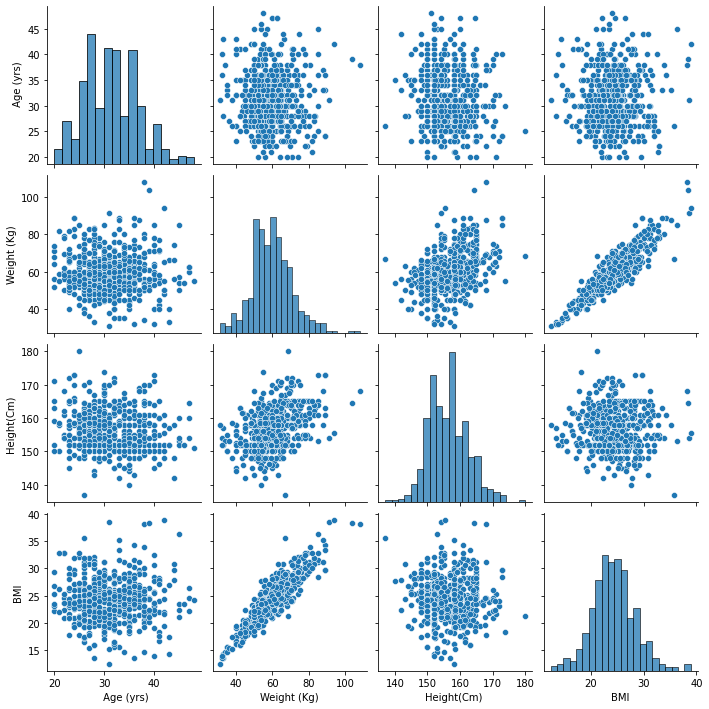

In [ ]:
sns.pairplot(pcos.iloc[:,1:5])

In [ ]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(pcos[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

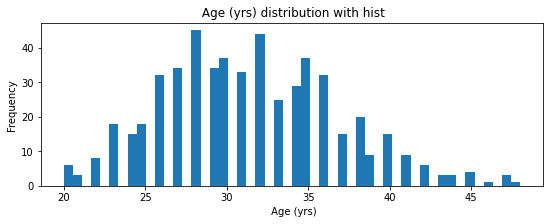

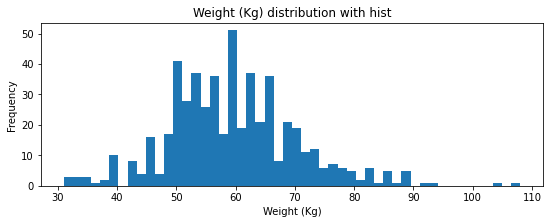

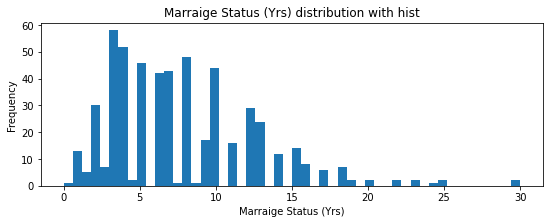

In [ ]:
numericVar = [" Age (yrs)", "Weight (Kg)","Marraige Status (Yrs)"]
for n in numericVar:
    plot_hist(n)

In [ ]:
pcos=pcos.dropna()
pcos.corr()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
PCOS (Y/N),1.000000,-0.171349,0.209969,0.065465,0.198703,0.033701,0.092699,0.038641,0.087809,0.401837,...,0.290335,0.380985,0.071979,0.007923,0.033562,0.601208,0.650929,0.129997,0.094528,0.107639
Age (yrs),-0.171349,1.000000,-0.030984,-0.119885,0.019924,-0.011836,0.045634,0.088748,-0.023686,-0.085473,...,-0.034990,-0.034234,-0.025916,0.072437,0.066779,-0.113809,-0.158386,-0.020969,-0.082677,-0.100115
Weight (Kg),0.209969,-0.030984,1.000000,0.419808,0.901799,0.071354,0.020101,0.045339,0.009363,0.201575,...,0.064817,0.162872,-0.065109,0.028122,0.129210,0.171896,0.124669,-0.023517,-0.075220,-0.009452
Height(Cm),0.065465,-0.119885,0.419808,1.000000,-0.006899,0.039409,-0.073608,-0.030492,0.025962,-0.021780,...,0.064912,0.032853,0.015610,-0.068720,0.009094,0.102968,0.075560,-0.027415,0.058357,-0.056273
BMI,0.198703,0.019924,0.901799,-0.006899,1.000000,0.061169,0.050285,0.064226,0.002556,0.235763,...,0.044843,0.159933,-0.078034,0.070394,0.138535,0.142413,0.104519,-0.013584,-0.113158,0.011024
Blood Group,0.033701,-0.011836,0.071354,0.039409,0.061169,1.000000,0.047865,-0.022707,-0.001652,0.123310,...,0.040382,-0.034770,0.067994,0.031264,0.051543,0.058719,0.014200,-0.037599,-0.017517,-0.015257
Pulse rate(bpm),0.092699,0.045634,0.020101,-0.073608,0.050285,0.047865,1.000000,0.305676,-0.052796,0.103416,...,-0.004395,0.059712,-0.039055,-0.025021,0.007676,0.041534,0.049168,-0.048671,-0.034141,-0.040456
RR (breaths/min),0.038641,0.088748,0.045339,-0.030492,0.064226,-0.022707,0.305676,1.000000,-0.038693,0.012769,...,0.032356,0.137533,-0.054183,0.013981,0.057322,0.069848,0.012856,-0.029196,-0.020780,-0.066551
Hb(g/dl),0.087809,-0.023686,0.009363,0.025962,0.002556,-0.001652,-0.052796,-0.038693,1.000000,0.040443,...,0.051089,0.077310,0.011980,0.053583,0.000475,0.062314,0.073459,0.030879,0.023528,-0.063592
Cycle(R/I),0.401837,-0.085473,0.201575,-0.021780,0.235763,0.123310,0.103416,0.012769,0.040443,1.000000,...,0.129362,0.208929,-0.006537,0.051787,0.082659,0.293743,0.253369,0.034379,0.015318,0.039612


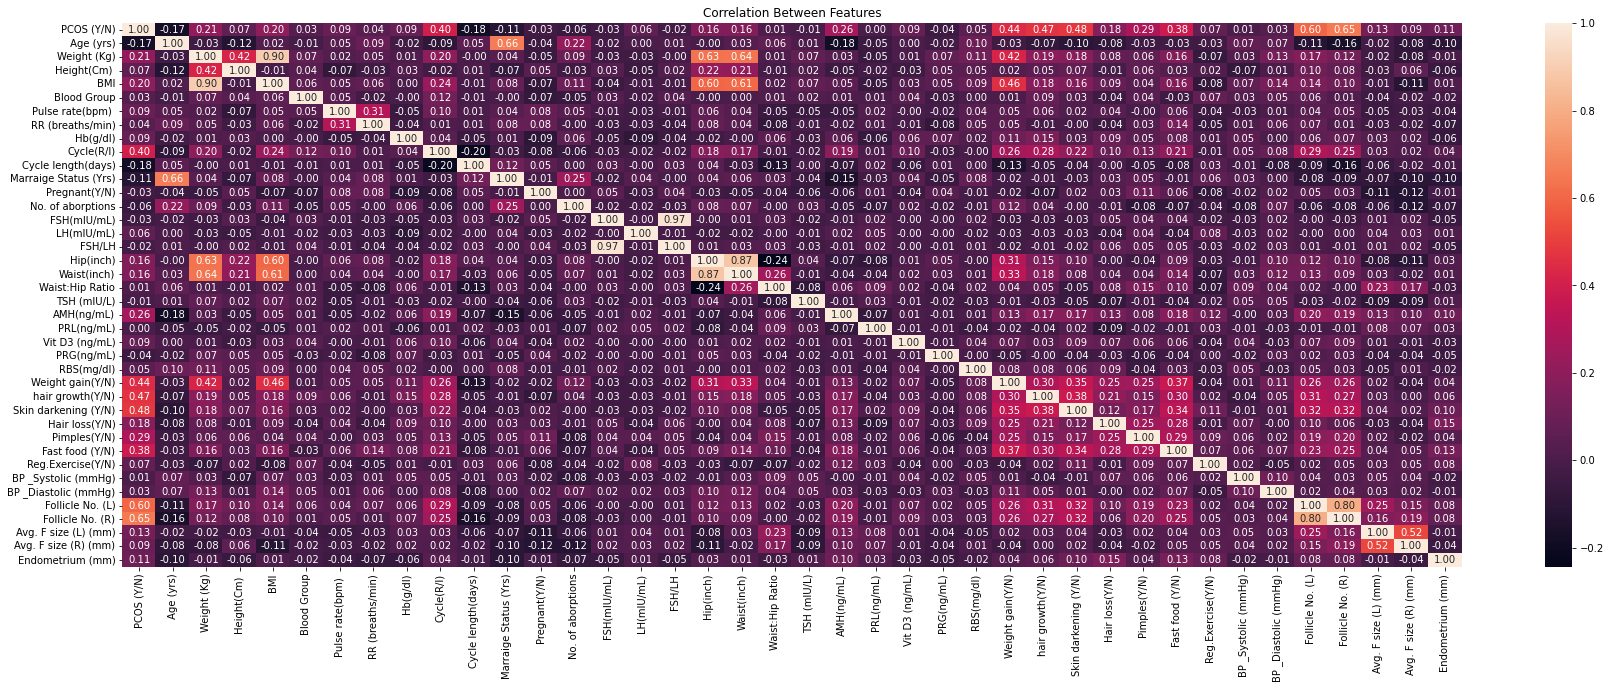

In [ ]:
corr_matrix= pcos.corr()
plt.subplots(figsize=(30,10))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f");
plt.title("Correlation Between Features")
plt.show()

In [ ]:
X = pcos.iloc[:,1:40].values
Y = pcos.iloc[:,0].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3 , random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
def models(X_train, Y_train):
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    print('Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('Random Forest Classifier:', forest.score(X_train, Y_train))
    return log, forest


In [ ]:
model = models(X_train, Y_train)


Logistic Regression Training Accuracy: 0.9521276595744681
Random Forest Classifier: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix

for i in range( len(model) ) :
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    TP = cm[1][1]
    TN = cm[0][0]
    FN = cm[1][0]
    FP = cm[0][1]
  
    print(cm)
    print('Testing Accuracy = ', (TP + TN)/ (TP + TN + FP + FN))

[[92  9]
 [16 45]]
Testing Accuracy =  0.845679012345679
[[98  3]
 [20 41]]
Testing Accuracy =  0.8580246913580247
